In [114]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Here I'm loading all the datasets to see what data we can work with in our analysis

In [115]:
df1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df2 = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df3 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t', skiprows=[6])  # Skip line 7 (index 6)
df4 = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', skiprows=[4], encoding='latin-1')  # Use 'latin-1' encoding
df6 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')


In [116]:
#Let's explore the columns in each dataset before determining which ones to use.

print('df1',df1.columns)
print('df2',df2.columns)
print('df3',df3.columns)
print('df4',df4.columns)
print('df6',df6.columns)

df1 Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
df2 Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
df3 Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')
df4 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')
df6 Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


Given we want to analyse the financial successes of movies, popularity and genres, we will use df2, df3 and df6 as our main datasets. For now, let's start with df6 (tn.movie_budgets.csv.gz) to profitability and budgets.


In [117]:
df6['movie'].head()

# Checking for missing values in 'domestic_gross' df6

df6_na = df6['domestic_gross'].isna()
df6_missing = df6_na.sum()

# Checking the data types of 'domestic_gross' in and df6 in case we need to convert any data.
print('df6 domestic_gross dtype = ', df6['domestic_gross'].dtype)


# Let's print a few sample values for analysis
df6['domestic_gross'].head()
df1['domestic_gross'].head()

print('missing values in df6 = ' + str(df6_missing))

###INCLUDE INTERPOLATION 

df6 domestic_gross dtype =  object
missing values in df6 = 0


There are no missing values in the domestic_gross column in df6, which is excellent.

The domestic_gross datatype however is an object which is not ideal for measuring financial success. Let's look at what is preventing this from being a completely numerical set of data. We can do this by looking at a small section of the data.

In [118]:
df6['domestic_gross'].head

<bound method NDFrame.head of 0       $760,507,625
1       $241,063,875
2        $42,762,350
3       $459,005,868
4       $620,181,382
            ...     
5777              $0
5778         $48,482
5779          $1,338
5780              $0
5781        $181,041
Name: domestic_gross, Length: 5782, dtype: object>

Upon looking at some sample values,it looks like the dollar signs '$' and commas ',' are preventing this column to contain completely numerical data. We will need to remove these and convert this into numeric type.

In [127]:
#Convert 'domestic_gross' in df6 to a numerical format by removing dollar sign and commas, then converting to integer.
df6['domestic_gross_num'] = df6['domestic_gross'].replace('[\$,]', '', regex=True).astype(int)

#Identify movies with the highest domestic gross in df6
top_domestic_gross_df6 = df6.nlargest(5, 'domestic_gross_num')

print ('df6 top 5 ', top_domestic_gross_df6)


df6 top 5      id  release_date                                 movie production_budget  \
5    6  Dec 18, 2015  Star Wars Ep. VII: The Force Awakens      $306,000,000   
0    1  Dec 18, 2009                                Avatar      $425,000,000   
41  42  Feb 16, 2018                         Black Panther      $200,000,000   
6    7  Apr 27, 2018                Avengers: Infinity War      $300,000,000   
42  43  Dec 19, 1997                               Titanic      $200,000,000   

   domestic_gross worldwide_gross  domestic_gross_num  worldwide_gross_num  \
5    $936,662,225  $2,053,311,220           936662225         2.053311e+09   
0    $760,507,625  $2,776,345,279           760507625         2.776345e+09   
41   $700,059,566  $1,348,258,224           700059566         1.348258e+09   
6    $678,815,482  $2,048,134,200           678815482         2.048134e+09   
42   $659,363,944  $2,208,208,395           659363944         2.208208e+09   

    foreign_gross_est  
5        1.1166

The top 5 highest domestic_grossing movies in df6 are:
Star Wars Ep. VII: The Force Awakens - $936,662,225
Avatar - $760,507,625
Black Panther - $700,059,566
Avengers: Infinity War - $678,815,482
Titanic - $659,363,944

In [120]:
# Summing up the domestic gross for all movies in each year in df1 and df6. As there is no year column in df6, we will need to use release date and rename the column for consistency.
domestic_gross_yearly_df6 = df6.groupby(df6['release_date'].str[-4:].astype(int))['domestic_gross_num'].sum().reset_index()
domestic_gross_yearly_df6.columns = ['year', 'domestic_gross_num']

# Identifying the year with the highest total domestic gross in df1 and df6
top_domestic_year_df6 = domestic_gross_yearly_df6.loc[domestic_gross_yearly_df6['domestic_gross_num'].idxmax()]

print(top_domestic_year_df6)


year                         2016
domestic_gross_num    11042828402
Name: 91, dtype: int64


Let's move onto the next part of our analysis, which is analysing the worldwide_gross in df6.

In [121]:
# Check for missing values in 'worldwide_gross' df6
print('There are ', df6['worldwide_gross'].isna().sum(), 'missing values in df6')

# Checking the data types of 'foreign_gross' in df1 and 'worldwide_gross' in df6
print('df6 worldwide_gross dtype is ', df6['worldwide_gross'].dtype)

# If df6['worldwide_gross'] is not a float or int, we need to clean it
print ('df6 first 5 values ', df6['worldwide_gross'].head())

There are  0 missing values in df6
df6 worldwide_gross dtype is  object
df6 first 5 values  0    $2,776,345,279
1    $1,045,663,875
2      $149,762,350
3    $1,403,013,963
4    $1,316,721,747
Name: worldwide_gross, dtype: object


There are 0 missing values in df6 ['worldwide_gross'].
The df6 data type is an object, which includes commas and dollar signs, which we'll need to remove as we have previously.

In [122]:
# For df6['worldwide_gross'], removing dollar signs and commas, then converting to integer
df6['worldwide_gross_num'] = df6['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# We should now be able to identify movies with the highest worldwide gross in both datasets
top_worldwide_gross_df6 = df6.nlargest(5, 'worldwide_gross_num')

print(top_worldwide_gross_df6)

    id  release_date                                 movie production_budget  \
0    1  Dec 18, 2009                                Avatar      $425,000,000   
42  43  Dec 19, 1997                               Titanic      $200,000,000   
5    6  Dec 18, 2015  Star Wars Ep. VII: The Force Awakens      $306,000,000   
6    7  Apr 27, 2018                Avengers: Infinity War      $300,000,000   
33  34  Jun 12, 2015                        Jurassic World      $215,000,000   

   domestic_gross worldwide_gross  domestic_gross_num  worldwide_gross_num  
0    $760,507,625  $2,776,345,279           760507625         2.776345e+09  
42   $659,363,944  $2,208,208,395           659363944         2.208208e+09  
5    $936,662,225  $2,053,311,220           936662225         2.053311e+09  
6    $678,815,482  $2,048,134,200           678815482         2.048134e+09  
33   $652,270,625  $1,648,854,864           652270625         1.648855e+09  


It's interesting to note that it is unclear whether 'worldwide_gross' includes both domestic and foreign values, or if it just contains foreign values. Looking at the df1 columns, there is a clear differentiation between how much was made domestically and globally with the column names 'domestic_gross' and 'foreign_gross'.

To ensure we are only looking foreign values, let's subtract 'domestic_gross' from 'worldwide_gross' and compare the values with df1's 'foreign_gross'

In [123]:
#Summing up the worldwide gross for all movies in each year in df6 and subtracting the domestic gross to estimate the foreign gross
df6['foreign_gross_est'] = df6['worldwide_gross_num'] - df6['domestic_gross_num']
foreign_gross_est_year = df6.groupby(df6['release_date'].str[-4:].astype(int))['foreign_gross_est'].sum().reset_index()
foreign_gross_est_year.columns = ['year', 'foreign_gross']

# Identifying the year with the highest total foreign gross in df1 and df6
top_foreign_year_df6 = foreign_gross_est_year.loc[foreign_gross_est_year['foreign_gross'].idxmax()]

top_foreign_year_df6

year             2.017000e+03
foreign_gross    1.797623e+10
Name: 92, dtype: float64

In df6, the year 2017 yielded the highest grossing films domestically, with a total domestic gross of 17.98 billion.

Let's now look at the foreign/worldwide gross to see which year was the most successful in box-office gross.

Likewise, in df6 the year 2017 yielded the highest grossing films internationally with foreign_gross equalling to 17.98 billion.

Let's now compare these figures with df1 to see if they're accurate

In [124]:
df1_6 =  pd.merge(df1, df6, left_on='title', right_on='movie', how='inner')
df1_6.columns

Index(['title', 'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'id',
       'release_date', 'movie', 'production_budget', 'domestic_gross_y',
       'worldwide_gross', 'domestic_gross_num', 'worldwide_gross_num',
       'foreign_gross_est'],
      dtype='object')

Now we want to check the columns of both datasets to ensure the financials we're using for df6 are accurate. To do this, we'll compare a movie that is in both datasets - "Black Panther".

In [139]:
# Filter the merged DataFrame for 'Black Panther'
black_panther_data = df1_6[df1_6['title'] == 'Black Panther']

# Check if 'Black Panther' exists in the merged DataFrame
if not black_panther_data.empty:
    # Extract the financial information from df1_6
    domestic_gross = black_panther_data['domestic_gross_x'].values[0]
    foreign_gross = black_panther_data['foreign_gross'].values[0]
    
    print(f"Domestic Gross for 'Black Panther' in df1_6: ${domestic_gross}")
    print(f"Foreign Gross for 'Black Panther' in df1_6: ${foreign_gross}")
else:
    print("'Black Panther' is not found in the merged DataFrame.")

#Let's compare this to our original findings for Black Panther in df6

df_6_black_panther = df6[df6['movie'] == 'Black Panther']

if not df_6_black_panther.empty:
    domestic_gross_df6 = df_6_black_panther['domestic_gross_num'].values[0]
    foreign_gross_df6 = df_6_black_panther['foreign_gross_est'].values[0]
    
    print(f"Domestic Gross for 'Black Panther' in df6: ${domestic_gross_df6}")
    print(f"Worldwide Gross for 'Black Panther' in df6: ${foreign_gross_df6}")
else:
    print("'Black Panther' is not found in df6.")


Domestic Gross for 'Black Panther' in df1_6: $700100000.0
Foreign Gross for 'Black Panther' in df1_6: $646900000
Domestic Gross for 'Black Panther' in df6: $700059566
Worldwide Gross for 'Black Panther' in df6: $648198658.0


The results show that for both df1 and df6, the figures are quite similar. Similarly, we can confirm that the worldwide_gross column in df6 did actually include both domestic and foreign values, as the foreign_gross_est, which we calculated above show a similar figure to df1's foreign_gross.

The discrepancy in figures could be due to different time periods when this data was captured

Let's now look at which genres were the most successful in df3

In [ ]:
# Check for missing values in 'genre' of df3
print('There are ', df3['genre'].isna().sum(), 'missing genres from df3')

# Checking the data type of 'genre' in df3
print('The dtype of the genre column in df3 is', df3['genre'].dtype)

# Extracting and expanding the genres, as some movies are categorized under multiple genres
df3['genre_list'] = df3['genre'].str.split('|')
df3_split = df3.explode('genre_list')

#Lets calculate the distribution of movies across different genres
genre_distribution_df3 = df3_split['genre_list'].value_counts(normalize=False)

print (genre_distribution_df3.head(10))  # Displaying top 10 genres for simplicity


There are  8 missing genres from df3
The dtype of the genre column in df3 is object
Drama                          911
Comedy                         550
Action and Adventure           366
Mystery and Suspense           309
Art House and International    265
Romance                        198
Classics                       193
Science Fiction and Fantasy    172
Horror                         134
Musical and Performing Arts     98
Name: genre_list, dtype: int64


The data above suggests that Drama, Comedy or Drama & Comedy tend to be the most common genres in df3. Unfortunately I am unable to find a common ID to merge df6 with df3. If I was able to find one, I would do an analysis on which genre is the most profitable to produce movies. Instead, let's do a profitability analysis of whether a higher production budget indicates a higher overall revenue.

In [141]:
# Convert financial columns to numeric
df6['production_budget_num'] = df6['production_budget'].replace('[\$,]', '', regex=True).astype(int)
df6['domestic_gross_num'] = df6['domestic_gross'].replace('[\$,]', '', regex=True).astype(int)

# # Calculate Net Revenue
df6['net_domestic_revenue'] = df6['domestic_gross_num'] - df6['production_budget_num']
df6['net_worldwide_revenue'] = df6['foreign_gross_est'] - df6['production_budget_num']

# # Analyzing the films with the highest net revenues
top_net_domestic = df6.nlargest(5, 'net_domestic_revenue')[['movie', 'net_domestic_revenue']]
top_net_worldwide = df6.nlargest(5, 'net_worldwide_revenue')[['movie', 'net_worldwide_revenue']]

print('The top net domestic revenue is', top_net_domestic)
print('The top net worldwide revenue is', top_net_worldwide)




The top net domestic revenue is                                      movie  net_domestic_revenue
5     Star Wars Ep. VII: The Force Awakens             630662225
41                           Black Panther             500059566
42                                 Titanic             459363944
3464          Star Wars Ep. IV: A New Hope             449998007
33                          Jurassic World             437270625
The top net worldwide revenue is                                              movie  net_worldwide_revenue
0                                           Avatar           1.590838e+09
42                                         Titanic           1.348844e+09
6                           Avengers: Infinity War           1.069319e+09
66                                       Furious 7           9.757158e+08
260  Harry Potter and the Deathly Hallows: Part II           8.355000e+08


Here are the films with the highest net revenues:


Domestic Net Revenue:

Star Wars Ep. VII: The Force Awakens
Black Panther
Titanic
Star Wars Ep. IV: A New Hope
Jurassic World


Worldwide Net Revenue:

Avatar
Titanic
Avengers: Infinity War
Star Wars Ep. VII: The Force Awakens
Jurassic World

Now that we know that our domestic_gross and foreign_gross_est can be relied upon for data analysis, let's look at the relationship between production budgets and the amount of money these movies have generated, to see if the production budgets correlates to revenue.

These movies have generated the highest net revenues, both domestically and worldwide, by subtracting their production budget from their gross revenues.


In [142]:
# Calculating the correlation coefficients
correlation_net_domestic = df6['production_budget_num'].corr(df6['net_domestic_revenue'])
correlation_net_worldwide = df6['production_budget_num'].corr(df6['net_worldwide_revenue'])

correlation_net_domestic, correlation_net_worldwide

(0.09974209165512304, 0.4858291792513912)

The correlation coefficient between production budget and net domestic revenue is approximately 0.09. If we round this up to 0.01, it still indicates a very weak and almost no correlation between production budget and the net revenue generated domestically.

On the other hand, the correlation coefficient between production budget and net worldwide revenue is approximately 0.48, suggesting a stronger yet still not very strong positive correlation.

This implies that while there’s a moderate positive relationship between production budget and worldwide financial success, the relationship is much weaker when looking at domestic financial success alone.

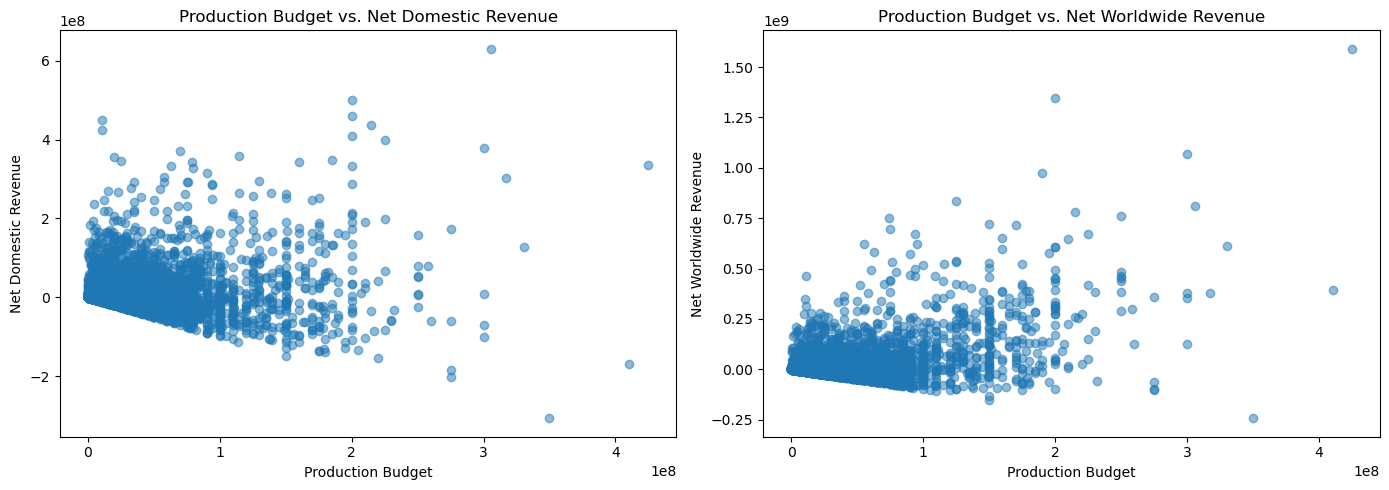

In [144]:
# Visualise the data by creating a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plotting the scatter plot for Production Budget vs. Net Domestic Revenue
ax[0].scatter(df6['production_budget_num'], df6['net_domestic_revenue'], alpha=0.5)
ax[0].set_title('Production Budget vs. Net Domestic Revenue')
ax[0].set_xlabel('Production Budget')
ax[0].set_ylabel('Net Domestic Revenue')

# Plotting the scatter plot for Production Budget vs. Net Worldwide Revenue
ax[1].scatter(df6['production_budget_num'], df6['net_worldwide_revenue'], alpha=0.5)
ax[1].set_title('Production Budget vs. Net Worldwide Revenue')
ax[1].set_xlabel('Production Budget')
ax[1].set_ylabel('Net Worldwide Revenue')

# Adjust layout to fit properly
plt.tight_layout()
plt.show()

It may be interesting to note which percentage of the most successful or popular films are in a different language other than english. We'll need to look at df2 and the columns 'popularity' and 'original_language'.

In [ ]:
df2_by_language = df2.groupby('original_language')
avg_vote_by_lang = df2_by_language['vote_average'].mean().sort_values(ascending=False)
total_pop_by_lang = df2_by_language['popularity'].sum().sort_values(ascending=False)
print( avg_vote_by_lang.head(), total_pop_by_lang.head())


original_language
dz    10.000000
ne     8.300000
ur     8.027273
cy     8.000000
gu     7.933333
Name: vote_average, dtype: float64 original_language
en    71895.155
fr     2155.574
ja     1513.434
es     1257.725
ru      708.220
Name: popularity, dtype: float64


In [ ]:
# Finding the rank and average popularity of English-language films
df2_en_popularity = df2_language_popularity.loc['en']
df2_en_rank = df2_language_popularity.rank(ascending=False).loc['en']

print('English films have a popularity score of ', df2_en_popularity, 'and is ranked', df2_en_rank, 'th')


English films have a popularity score of  3.0868213043664934 and is ranked 26.0 th


Next let's look at the relationship between runtimes and genres in df3


In [ ]:
#Convert runtime to float
df3['runtime'] = df3['runtime'].str.extract('(\d+)').astype(float)

#Expand Genres using similar code earlier
expanded_genres = df3.assign(genre=df3['genre'].str.split('|')).explode('genre')

#Calculate the average runtime
average_runtime_per_genre = expanded_genres.groupby('genre')['runtime'].mean().sort_values(ascending=False)

print('The average runtime per genre is', average_runtime_per_genre)

The average runtime per genre is genre
Television                     111.173913
Romance                        110.590909
Faith and Spirituality         109.090909
Drama                          108.807095
Art House and International    108.692308
Classics                       107.445596
Action and Adventure           105.655462
Mystery and Suspense           105.431373
Gay and Lesbian                105.000000
Musical and Performing Arts    104.969072
Western                        102.437500
Comedy                         101.932110
Science Fiction and Fantasy    101.573964
Sports and Fitness             101.500000
Cult Movies                     99.750000
Kids and Family                 96.520833
Horror                          94.200000
Documentary                     91.194030
Animation                       86.723404
Anime and Manga                 86.000000
Special Interest                84.293103
Name: runtime, dtype: float64


Next, to understand what the ideal movie is, let's look at the average runtimes of the movies in df3 against their rating.

In [ ]:
group_by_rating = df3.groupby('rating')

# Calculate the mean runtime for each rating group
average_runtime = group_by_rating['runtime'].mean()

# Sort the average runtimes in descending order
sorted_average_runtime = average_runtime.sort_values(ascending=False)

# Display the top 5 results
top_average_runtimes = sorted_average_runtime.head()

print(top_average_runtimes)


rating
PG-13    107.375000
R        106.568401
PG       104.789916
NR        99.887967
G         97.912281
Name: runtime, dtype: float64


Next let's try and visualise this data!

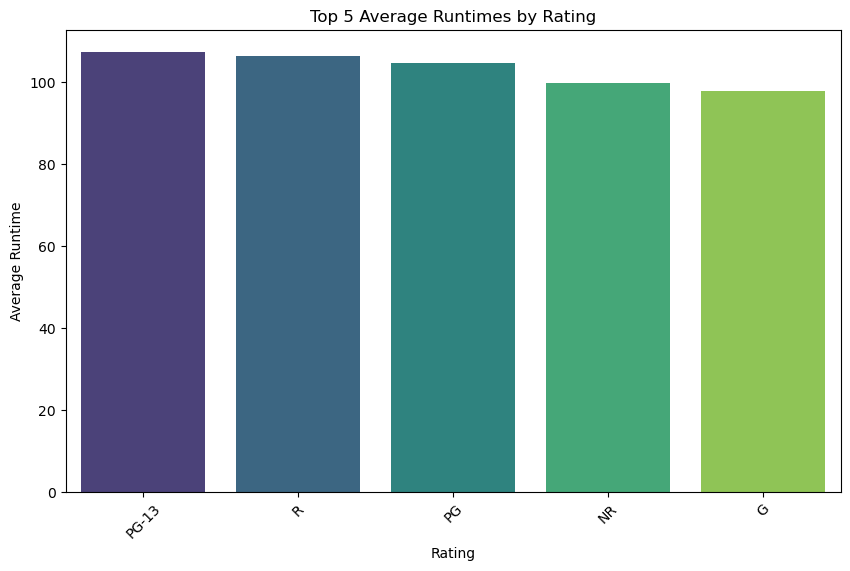

In [ ]:
# Display the top 5 results
top_average_runtimes = sorted_average_runtime.head()

# Create a bar graph using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_average_runtimes.index, y=top_average_runtimes.values, palette='viridis')
plt.title('Top 5 Average Runtimes by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Runtime')
plt.xticks(rotation=45)
plt.show()

On average PG-13, R and PG films are clock in at around 105 minutes. Next, let's look at which genres is assigned the most common ratings.

In [ ]:
#Using similar code from earlier
df3_expanded_genres = df3.assign(genre=df3['genre'].str.split('|')).explode('genre')

#Group by Rating
grouped_by_rating = df3_expanded_genres.groupby('rating')

#Find Most Common Genre by defining a function to find the most common genre
def most_common_genre(x):
    return x.value_counts().idxmax()

# Apply the function to the 'genre' column within each group
most_common_genre_per_rating = grouped_by_rating['genre'].apply(most_common_genre)

print(most_common_genre_per_rating)


rating
G         Drama
NC17     Comedy
NR        Drama
PG        Drama
PG-13     Drama
R         Drama
Name: genre, dtype: object


From here, we can understand that the most common genre for G, NR, PG, PG-13 and R-rated films all share the same genre - Drama.

Let's visualise all this data now!

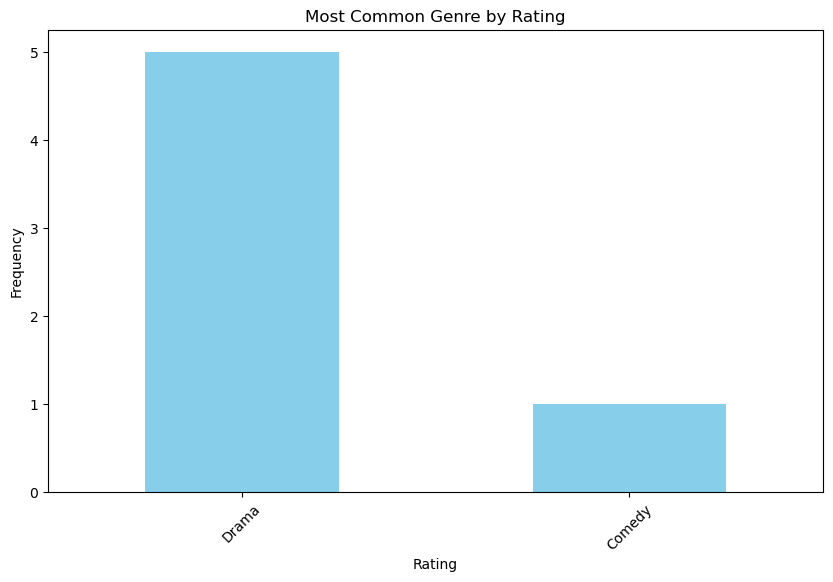

In [ ]:
plt.figure(figsize=(10, 6))
most_common_genre_per_rating.value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Common Genre by Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

analyse successful director, writer financially
genre and popularity and writer and director

In [ ]:
# Converting 'release_date' to datetime format and extracting month and day of week
df2['release_date'] = pd.to_datetime(df2['release_date'], errors='coerce')
df2['release_month'] = df2['release_date'].dt.month_name()
df2['release_day'] = df2['release_date'].dt.day_name()

# Group by 'release_month' and calculate mean values
month_group = df2.groupby('release_month').agg(
    mean_popularity=pd.NamedAgg(column='popularity', aggfunc='mean'),
    mean_vote=pd.NamedAgg(column='vote_average', aggfunc='mean')
).reset_index()

# Group by 'release_day' and calculate mean values
day_group = df2.groupby('release_day').agg(
    mean_popularity=pd.NamedAgg(column='popularity', aggfunc='mean'),
    mean_vote=pd.NamedAgg(column='vote_average', aggfunc='mean')
).reset_index()



In [ ]:
# Using 'original_title' from df2 and 'movie' from df6 as keys
merged_df_26 = pd.merge(df2, df6, left_on='original_title', right_on='movie', how='inner')

# Step 3: Data Cleaning
# Ensure numerical columns are in the correct format
merged_df_26['production_budget'] = pd.to_numeric(merged_df_26['production_budget'].str.replace('[\$,]', '', regex=True))
merged_df_26['domestic_gross'] = pd.to_numeric(merged_df_26['domestic_gross'].str.replace('[\$,]', '', regex=True))
merged_df_26['worldwide_gross'] = pd.to_numeric(merged_df_26['worldwide_gross'].str.replace('[\$,]', '', regex=True))

# Step 4: Calculate Correlations
corr_budget = merged_df_26['popularity'].corr(merged_df_26['production_budget'])
corr_domestic = merged_df_26['popularity'].corr(merged_df_26['domestic_gross'])
corr_worldwide = merged_df_26['popularity'].corr(merged_df_26['worldwide_gross'])

# Print calculated correlations
print(f"Correlation between Popularity and Production Budget: {corr_budget:.2f}")
print(f"Correlation between Popularity and Domestic Gross: {corr_domestic:.2f}")
print(f"Correlation between Popularity and Worldwide Gross: {corr_worldwide:.2f}")




Correlation between Popularity and Production Budget: 0.57
Correlation between Popularity and Domestic Gross: 0.55
Correlation between Popularity and Worldwide Gross: 0.58


ALSO INCLUDE FOREIGN GROSS BY SUBTRACTING DOM GROSS FROM WORLDWIDE TO GET FOREIGN GROSS!!!!

Correlation between Vote Average and Production Budget: 0.13
Correlation between Vote Average and Domestic Gross: 0.21
Correlation between Vote Average and Worldwide Gross: 0.20
Correlation between Vote Average and Net Revenue: 0.20


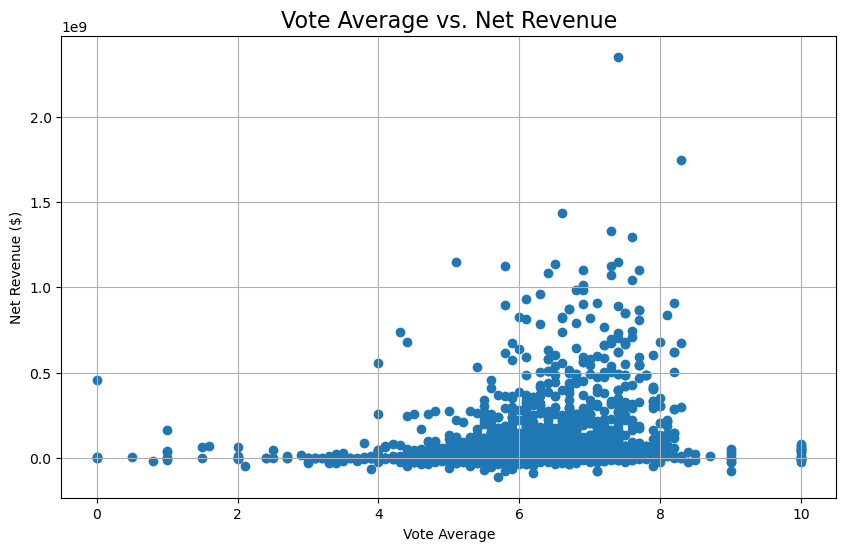

In [ ]:
# Correlation between 'vote_average' and financial metrics
corr_voteavg_budget = merged_df_26['vote_average'].corr(merged_df_26['production_budget'])
corr_voteavg_domestic = merged_df_26['vote_average'].corr(merged_df_26['domestic_gross'])
corr_voteavg_worldwide = merged_df_26['vote_average'].corr(merged_df_26['worldwide_gross'])

# Print calculated correlations
print(f"Correlation between Vote Average and Production Budget: {corr_voteavg_budget:.2f}")
print(f"Correlation between Vote Average and Domestic Gross: {corr_voteavg_domestic:.2f}")
print(f"Correlation between Vote Average and Worldwide Gross: {corr_voteavg_worldwide:.2f}")


# 1. Calculate Net Revenue
merged_df_26['net_revenue'] = merged_df_26['worldwide_gross'] - merged_df_26['production_budget']

# 2. Calculate Correlation
corr_voteavg_net = merged_df_26['vote_average'].corr(merged_df_26['net_revenue'])

# Print calculated correlation
print(f"Correlation between Vote Average and Net Revenue: {corr_voteavg_net:.2f}")

# 3. Visualize with Scatter Plot
plt.figure(figsize=(10, 6))  # size: 10x6
plt.scatter(merged_df_26['vote_average'], merged_df_26['net_revenue'])
plt.title('Vote Average vs. Net Revenue', fontsize=16)
plt.xlabel('Vote Average')
plt.ylabel('Net Revenue ($)')
plt.grid(True)
plt.show()




Correlation between Popularity and Net Revenue: 0.54


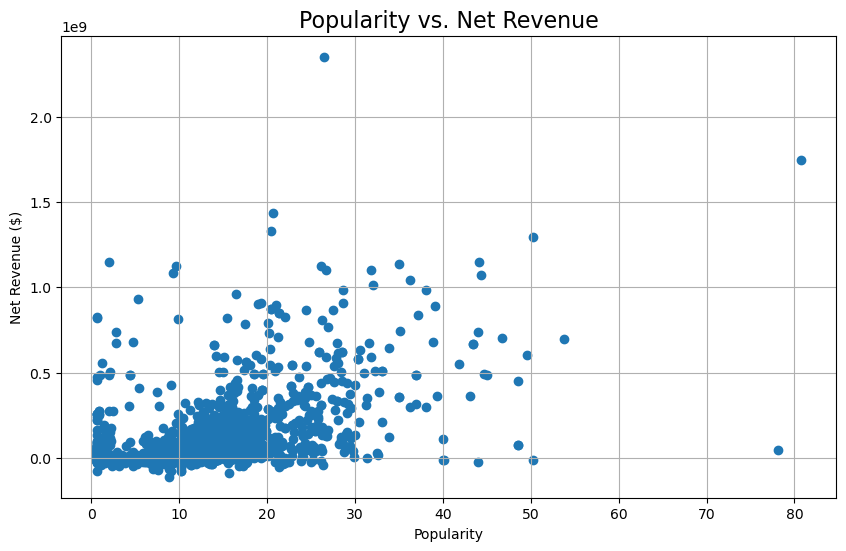

In [ ]:

# 1. Calculate Correlation
corr_popularity_net = merged_df_26['popularity'].corr(merged_df_26['net_revenue'])

# Print calculated correlation
print(f"Correlation between Popularity and Net Revenue: {corr_popularity_net:.2f}")

# 2. Visualize with Scatter Plot
plt.figure(figsize=(10, 6))  # size: 10x6
plt.scatter(merged_df_26['popularity'], merged_df_26['net_revenue'])
plt.title('Popularity vs. Net Revenue', fontsize=16)
plt.xlabel('Popularity')
plt.ylabel('Net Revenue ($)')
plt.grid(True)
plt.show()


Correlation between Production Budget and Domestic Gross: 0.69
Correlation between Production Budget and Worldwide Gross: 0.75


/var/folders/38/lrmvzxvj23x3_qbt7ltrk2l80000gn/T/ipykernel_82335/203430515.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df6['production_budget'] = pd.to_numeric(df6['production_budget'].str.replace('$', '').str.replace(',', ''))
/var/folders/38/lrmvzxvj23x3_qbt7ltrk2l80000gn/T/ipykernel_82335/203430515.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df6['domestic_gross'] = pd.to_numeric(df6['domestic_gross'].str.replace('$', '').str.replace(',', ''))
/var/folders/38/lrmvzxvj23x3_qbt7ltrk2l80000gn/T/ipykernel_82335/203430515.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expre

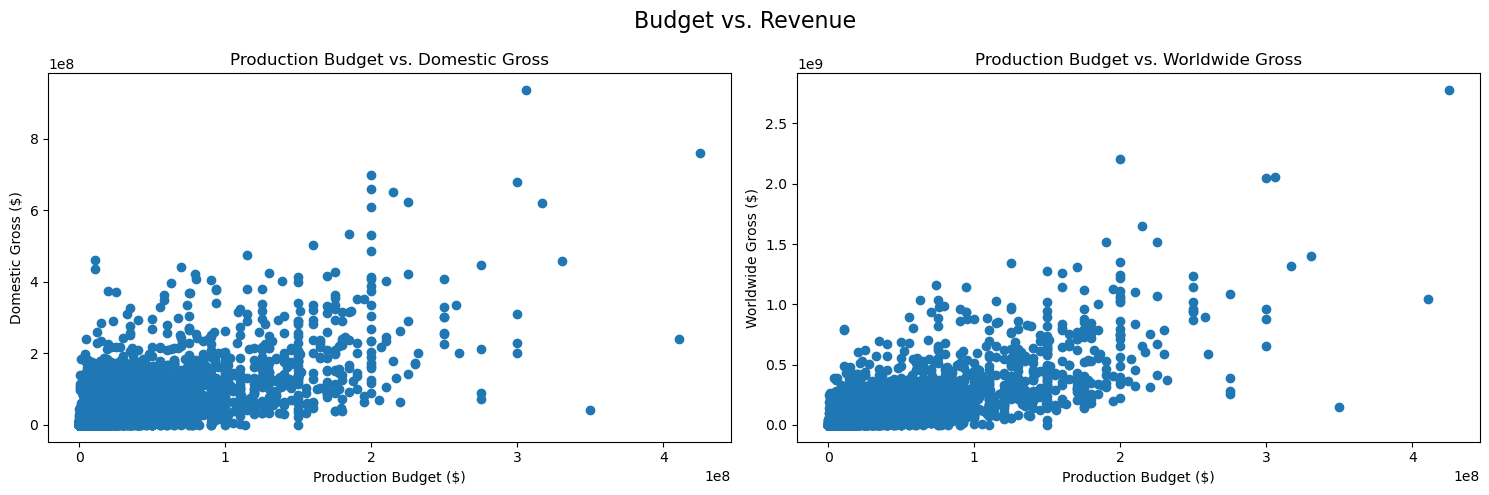

In [ ]:

# Ensure Data Types are Numeric
df6['production_budget'] = pd.to_numeric(df6['production_budget'].str.replace('$', '').str.replace(',', ''))
df6['domestic_gross'] = pd.to_numeric(df6['domestic_gross'].str.replace('$', '').str.replace(',', ''))
df6['worldwide_gross'] = pd.to_numeric(df6['worldwide_gross'].str.replace('$', '').str.replace(',', ''))

# 1. Calculate Correlations
# Correlation between 'production_budget' and 'domestic_gross'
corr_budget_domestic = df6['production_budget'].corr(df6['domestic_gross'])

# Correlation between 'production_budget' and 'worldwide_gross'
corr_budget_worldwide = df6['production_budget'].corr(df6['worldwide_gross'])

# Print calculated correlations
print(f"Correlation between Production Budget and Domestic Gross: {corr_budget_domestic:.2f}")
print(f"Correlation between Production Budget and Worldwide Gross: {corr_budget_worldwide:.2f}")

# 2. Visualize with Scatter Plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns, size: 15x5
fig.suptitle('Budget vs. Revenue', fontsize=16)  # Main title

# Plot 1: Production Budget vs. Domestic Gross
axes[0].scatter(df6['production_budget'], df6['domestic_gross'])
axes[0].set_title('Production Budget vs. Domestic Gross')
axes[0].set_xlabel('Production Budget ($)')
axes[0].set_ylabel('Domestic Gross ($)')

# Plot 2: Production Budget vs. Worldwide Gross
axes[1].scatter(df6['production_budget'], df6['worldwide_gross'])
axes[1].set_title('Production Budget vs. Worldwide Gross')
axes[1].set_xlabel('Production Budget ($)')
axes[1].set_ylabel('Worldwide Gross ($)')

# Show plots
plt.tight_layout()
plt.show()


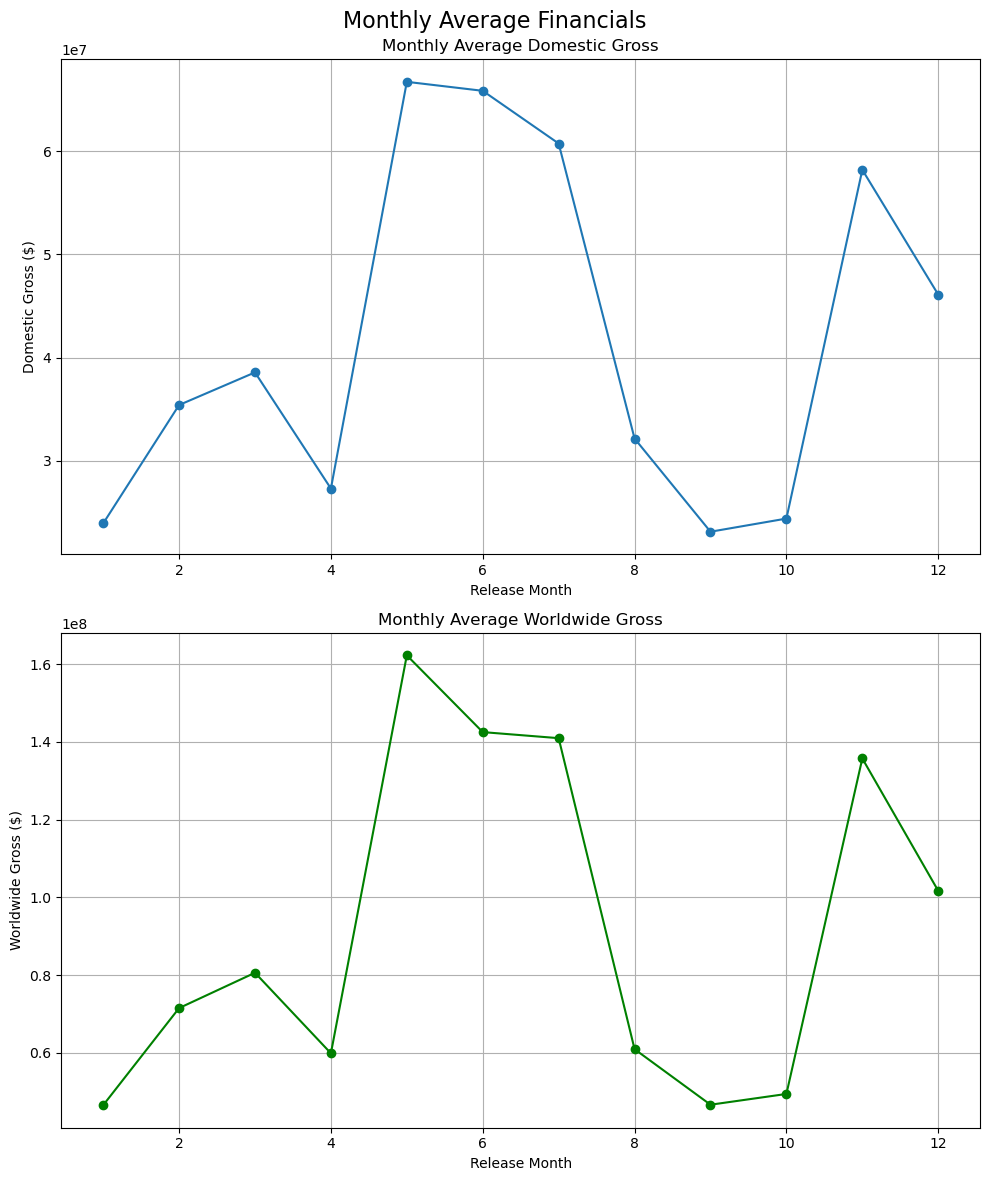

In [ ]:
# Ensure Date is in datetime format and extract month
df6['release_date'] = pd.to_datetime(df6['release_date'], errors='coerce')
df6['release_month'] = df6['release_date'].dt.month

# 1. Group Data by Release Month and calculate mean of financial metrics
monthly_data = df6.groupby('release_month').agg({
    'production_budget': 'mean',
    'domestic_gross': 'mean',
    'worldwide_gross': 'mean'
}).reset_index()

# 2. Visualize with Line Plots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # 2 rows, 1 column, size: 10x12
fig.suptitle('Monthly Average Financials', fontsize=16)  # Main title

# Plot 1: Monthly Average Domestic Gross
axes[0].plot(monthly_data['release_month'], monthly_data['domestic_gross'], marker='o')
axes[0].set_title('Monthly Average Domestic Gross')
axes[0].set_xlabel('Release Month')
axes[0].set_ylabel('Domestic Gross ($)')
axes[0].grid(True)

# Plot 2: Monthly Average Worldwide Gross
axes[1].plot(monthly_data['release_month'], monthly_data['worldwide_gross'], marker='o', color='green')
axes[1].set_title('Monthly Average Worldwide Gross')
axes[1].set_xlabel('Release Month')
axes[1].set_ylabel('Worldwide Gross ($)')
axes[1].grid(True)

# Show plots
plt.tight_layout()
plt.show()
